
#Subsección 2.2.2-Funciones kernel 

*Fecha de última modificación*: 10-oct-22.

*Tesis*: Modelación de la relación entre el cerebro y el comportamiento mediante campos Gaussianos.

*Autor*: Daniela Martínez Aguirre.

*Descripción*: Gráficas de las funciones kernel: 

* Kernel Exponencial Cuadrático
* Kernel Clase Matérns
* Kernel Exponencial $p$
* Kernel Racional Cuadrático

*Figuras*: 2.5 a 2.9



In [27]:
#Importamos librerías
#Versión utilizada agosto 2022 2.5.2
!pip install gpflow==2.5.2
import gpflow
import numpy as np

import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
#Puntos en el tiempo 
ts= np.linspace(0, 7, 100).reshape(-1, 1)

#Exponencial cuadrática


In [29]:
#Definamos la función kernel con distintos parámetros
k1=gpflow.kernels.SquaredExponential(lengthscales=2)
k2=gpflow.kernels.SquaredExponential(lengthscales=1)
k3=gpflow.kernels.SquaredExponential(lengthscales=.5)


In [30]:
#Calcula la matriz de Gram
K1=k1(ts,ts)
K2=k2(ts,ts)
K3=k3(ts,ts)

Text(0.5, 1.0, 'Kernel Exponencial Cuadrático')

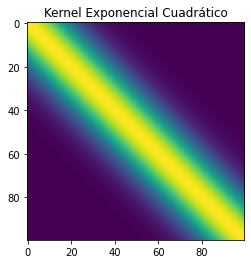

In [31]:
#Gráfica bidimensional del kernel
#Figura 2.9.1
plt.imshow(K2)
plt.title("Kernel Exponencial Cuadrático")


In [32]:
#Función
def sek(r,s,gamma):

    """
    Squared-Exponential covariance kernel
    """

    k12 = s**2*np.exp(-(1/2)*(r)**2/gamma**2)
    return k12

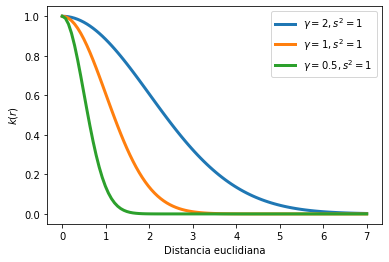

In [33]:
# Gráfica del kernel variando gamma
#Figura 2.5a
plt.plot( ts, sek(ts,1,2), label=r'$\gamma=2, s^2=1$',  linewidth=3)
plt.plot( ts, sek(ts,1,1), label=r'$\gamma=1, s^2=1$', linewidth=3)
plt.plot(ts, sek(ts,1,.5), linewidth=3, label=r'$\gamma=0.5, s^2=1$')
plt.ylabel(r'$k(r)$')
plt.xlabel("Distancia euclidiana")
plt.legend()
plt.show()

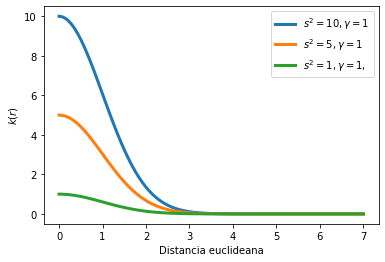

In [34]:
# Gráfica del kernel variando s cuadrada
#Figura 2.5b
plt.plot( ts, sek(ts,np.sqrt(10),1), label=r'$s^2=10, \gamma=1$',  linewidth=3)
plt.plot( ts, sek(ts,np.sqrt(5),1), label=r'$s^2=5, \gamma=1$', linewidth=3)
plt.plot(ts, sek(ts,np.sqrt(1),1), linewidth=3, label=r'$s^2=1, \gamma=1, $')
plt.ylabel(r'$k(r)$')
plt.xlabel("Distancia euclideana")
plt.legend()
plt.show()

#Exponencial $p$

In [35]:
#Definamos la función
kp=gpflow.kernels.Matern12()


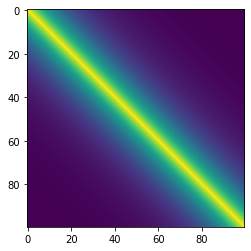

In [36]:
#Gráfica bidimensional del kernel
#Figura 2.9c
plt.imshow(kp(ts))
#plt.title("Kernel Exponencial Cuadrático")

In [37]:
#Función
def pek(r,gamma,p):

    """
    Squared-p covariance kernel
    """

    k12 = np.exp(-1.*(r)**p/gamma**p)
    return k12

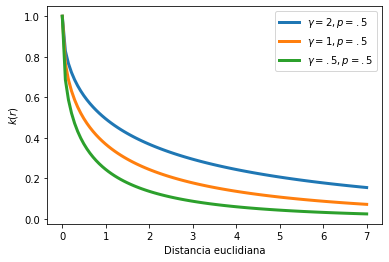

In [38]:
# Gráfica del  kernel cambiando gamma
#Figura 2.7a
plt.plot( ts, pek(ts,2,.5), label=r'$\gamma=2, p=.5$',  linewidth=3)
plt.plot( ts, pek(ts,1,.5), label=r'$\gamma=1, p=.5$', linewidth=3)
plt.plot(ts, pek(ts,.5,.5), linewidth=3, label=r'$\gamma=.5, p=.5$')
plt.ylabel(r'$k(r)$')
plt.xlabel("Distancia euclidiana")
plt.legend()
plt.show()

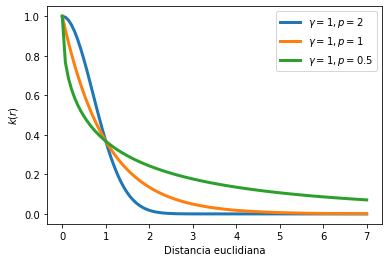

In [39]:
#Gráfica del  kernel cambiando p
#Figura 2.7b
plt.plot( ts, pek(ts,1,2), label=r'$\gamma=1, p=2$',  linewidth=3)
plt.plot( ts, pek(ts,1,1), label=r'$\gamma=1, p=1$', linewidth=3)
plt.plot(ts, pek(ts,1,.5), linewidth=3, label=r'$\gamma=1, p=0.5$')
plt.ylabel(r'$k(r)$')
plt.xlabel("Distancia euclidiana")
plt.legend()
plt.show()

#Racional Cuadrática

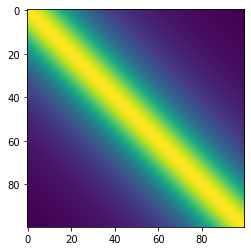

In [40]:
#Define la función kernel
kr=gpflow.kernels.RationalQuadratic(alpha=1,lengthscales=1)

#Gráfica bidimensional del kernel
#Figura 2.9b
plt.imshow(kr(ts))

In [41]:
#Puntos en el tiempo  y función
ts= np.linspace(0, 10, 100).reshape(-1, 1)
def rqk(r,gamma,alpha):

    """
    rational quadratic covariance kernel
    """

    k12 = (1+((r)**2/(2*alpha*gamma**2)))**(-1*alpha)
    return k12

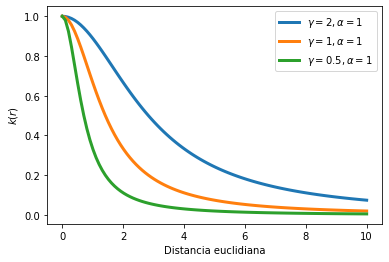

In [42]:
#Gráfica del  kernel cambiando gamma
#Figura 2.8a
plt.plot( ts, rqk(ts,2,1), label=r'$\gamma=2, \alpha=1$',  linewidth=3)
plt.plot( ts, rqk(ts,1,1), label=r'$\gamma=1, \alpha=1$', linewidth=3)
plt.plot(ts, rqk(ts,.5,1), linewidth=3, label=r'$\gamma=0.5, \alpha=1$')
plt.ylabel(r'$k(r)$')
plt.xlabel("Distancia euclidiana")
plt.legend()
plt.show()

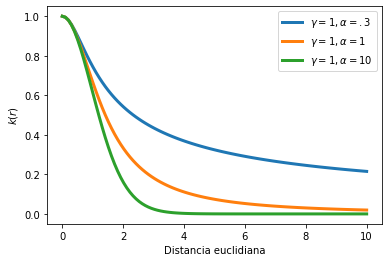

In [43]:
#Gráfica del  kernel cambiando alpha
#Figura 2.8b
plt.plot( ts, rqk(ts,1,.3), label=r'$\gamma=1, \alpha=.3$',  linewidth=3)
plt.plot( ts, rqk(ts,1,1), label=r'$\gamma=1, \alpha=1$', linewidth=3)
plt.plot(ts, rqk(ts,1,10), linewidth=3, label=r'$\gamma=1, \alpha=10$')
plt.ylabel(r'$k(r)$')
plt.xlabel("Distancia euclidiana")
plt.legend()
plt.show()

# Clase Máterns

In [44]:
#Puntos en el tiempo y función Matérn 3/2
ts= np.linspace(0, 10, 100).reshape(-1, 1)
def m32(r,l):

    """Matern 3/2
    """

    k12 = (1+np.sqrt(3)*r/l)* np.exp(-1*np.sqrt(3)*r/l)
    return k12

In [45]:
#Puntos en el tiempo  y función Matérn 5/2
ts= np.linspace(0, 10, 100).reshape(-1, 1)
def m52(r,l):

    """Matern 5/2
    """

    k12 = (1+(np.sqrt(5)*r/l)+(5/3)*(np.square(r)/np.square(l)))* np.exp(-1.*np.sqrt(5)*r/l)
    return k12

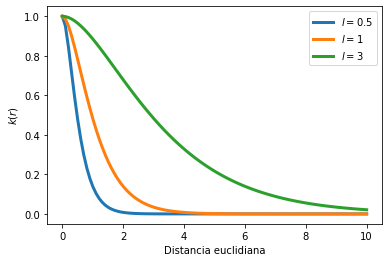

In [46]:
#Gráfica del  kernel cambiando l
#Figura 2.6
plt.plot( ts, m32(ts,.5), label=r'$l=0.5$',  linewidth=3)
plt.plot( ts, m32(ts,1), label=r'$l=1$', linewidth=3)
plt.plot( ts, m32(ts,3), label=r'$l=3$', linewidth=3)
plt.ylabel(r'$k(r)$')
plt.xlabel("Distancia euclidiana")
plt.legend()
plt.show()

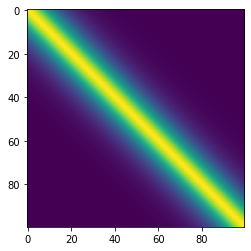

In [47]:
#Gráfica bidimensional del kernel
kr=gpflow.kernels.Matern32()
plt.imshow(kr(ts))